# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize': (10, 10)})
plt.figure(figsize=(10, 10));

<Figure size 720x720 with 0 Axes>

In [4]:
data = pd.read_csv('../input/breast-cancer-dataset/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.shape

(569, 32)

In [6]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
data.rename(columns = {'diagnosis':'target'}, inplace = True)
data.head(3)

,id,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Cleaning

In [9]:
data.isna().sum()

id                         0
target                     0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
data= data.drop('id', axis =1)
data.head(3)

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


# Visualizing and exploring

<AxesSubplot:xlabel='target', ylabel='count'>

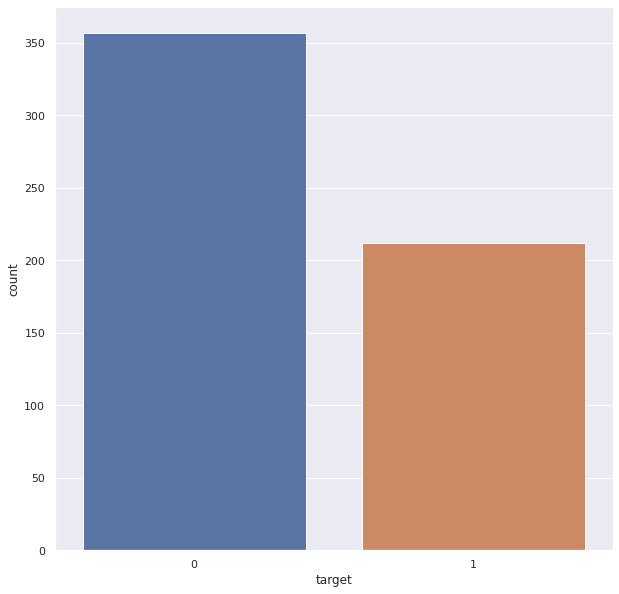

In [11]:

data["target"] = [1 if i.strip() == "M" else 0 for i in data.target]
sns.countplot(data['target'])

In [12]:
data.target.value_counts()

0    357
1    212
Name: target, dtype: int64

In [13]:
data.corr()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


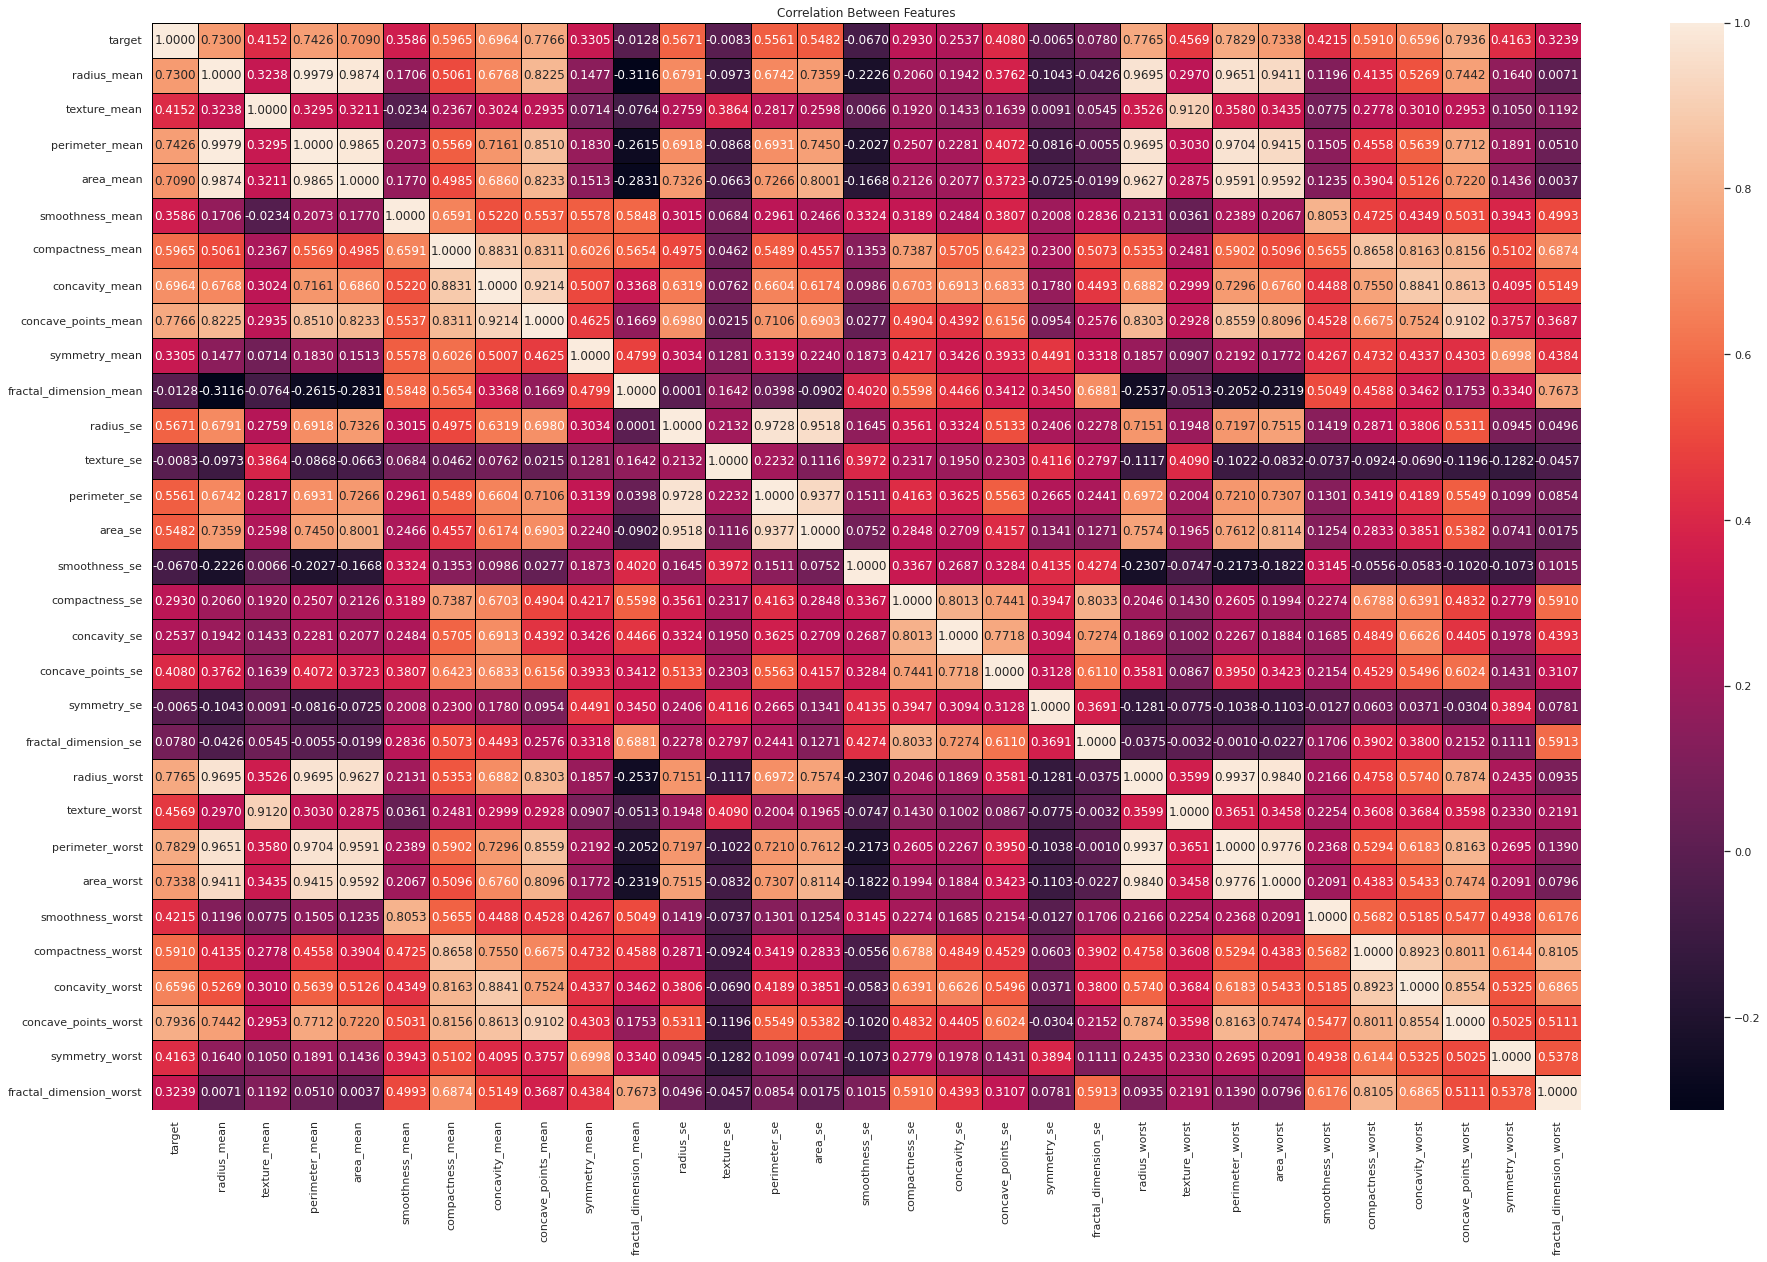

In [14]:
# I visualized the relationship between the data columns.
f, ax = plt.subplots(figsize = (32,20))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.title("Correlation Between Features")
plt.show()

Text(0.5, 1.0, 'Correlation Between Features with Corr Thresgold 0.75')

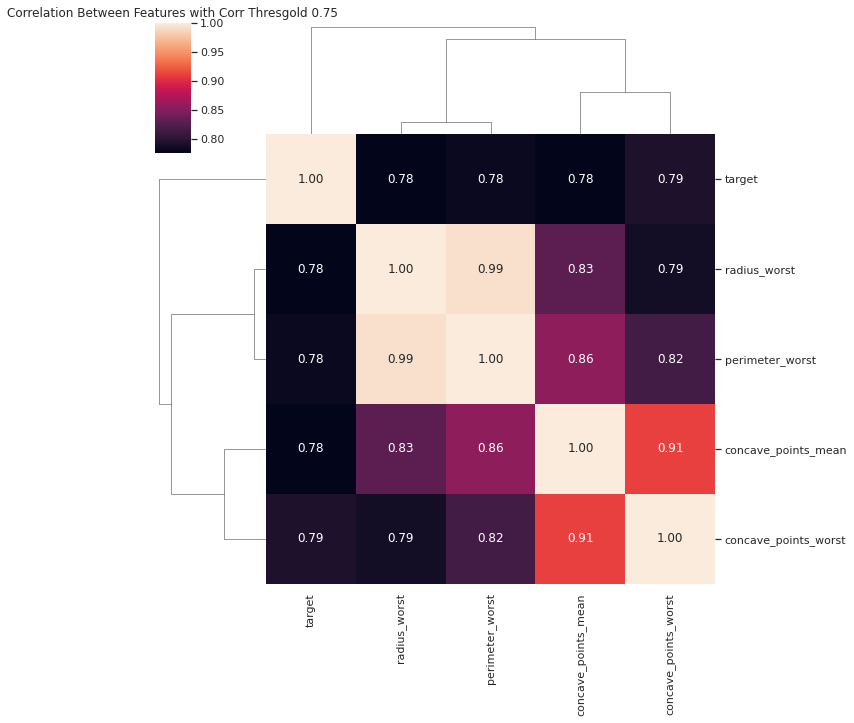

In [15]:
corr_matrix = data.corr()
threshold = 0.75
filtre = np.abs(corr_matrix['target'] > threshold)
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features with Corr Thresgold 0.75")

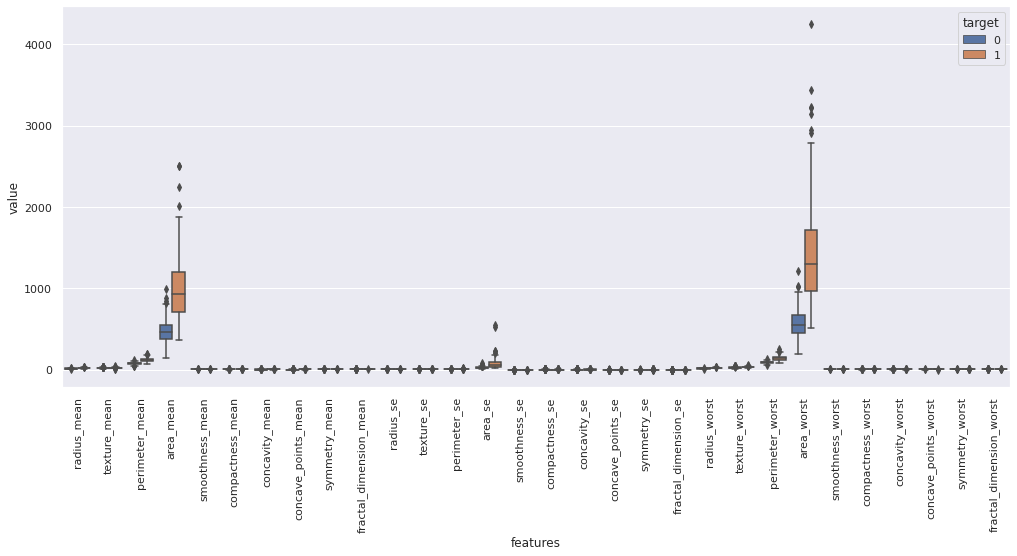

In [16]:
# Box Plot
data_melt = pd.melt(data, id_vars = "target",
                   var_name = "features",
                   value_name = "value")

plt.figure(figsize = (17,7))
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melt)
plt.xticks(rotation = 90)
plt.show()

 the box plots are not able to give clear indications of the outliers, we need to normalize the data.

plotting the pair plots between the highly correlated features.

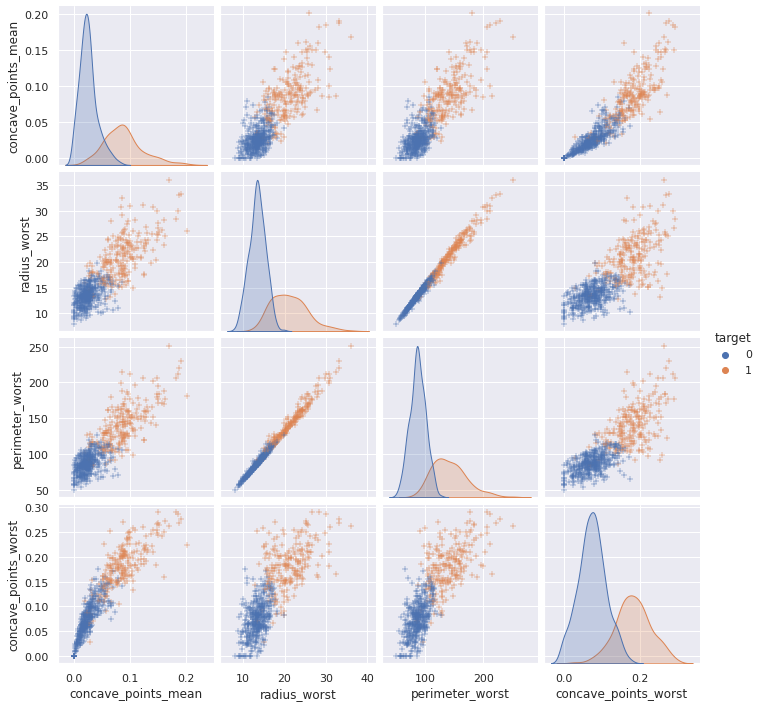

In [17]:
# Pair plot
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+", hue = "target")
plt.show()

Let's look for the skewness of the features. Skewness shows us the direction of the outliers.

In [18]:
skewness = pd.DataFrame(data.skew(), columns = ['skewness'])
skewness['skewness'] = ["Positively skewed" if i >= 1 else "Negatively skewed" if i <= -1 else "Normal Distribution" for i in skewness['skewness']]
skewness

,skewness
target,Normal Distribution
radius_mean,Normal Distribution
texture_mean,Normal Distribution
perimeter_mean,Normal Distribution
area_mean,Positively skewed
smoothness_mean,Normal Distribution
compactness_mean,Positively skewed
concavity_mean,Positively skewed
concave_points_mean,Positively skewed
symmetry_mean,Normal Distribution


# Outlier Analysis

**From the above output we can makeout that there are outliers present in the data, so we need to get rid of those before building our models**

To determine the outliers we are using the Density based outlier detection with the help of Local Outlier Factor(LOF).

Here we have choosen 'target' feature as an independent variable and the rest as dependent variables.

In [19]:
y = data.target
x = data.drop(["target"], axis = 1)
columns = x.columns.tolist()

In [20]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x) # Returns -1 for anomalies/outliers and +1 for inliers.
X_score = clf.negative_outlier_factor_
X_score[:5]

array([-1.42244008, -1.06678249, -0.97894764, -1.59693295, -1.06993589])

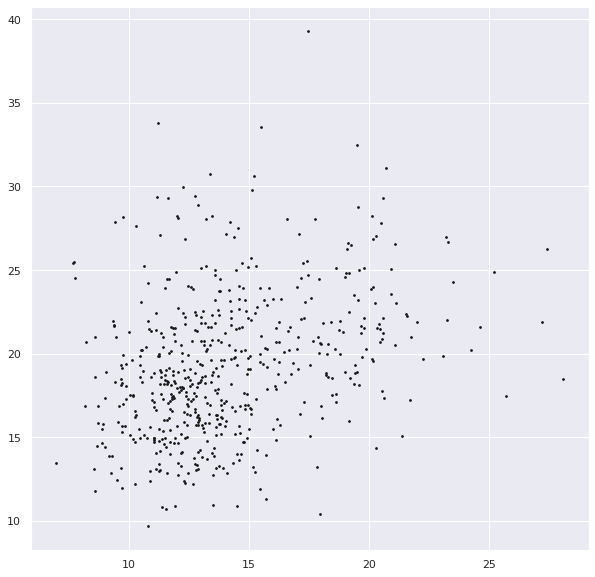

In [21]:
plt.figure()
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Point') # radius_mean and texture_mean as an example plot
plt.show()

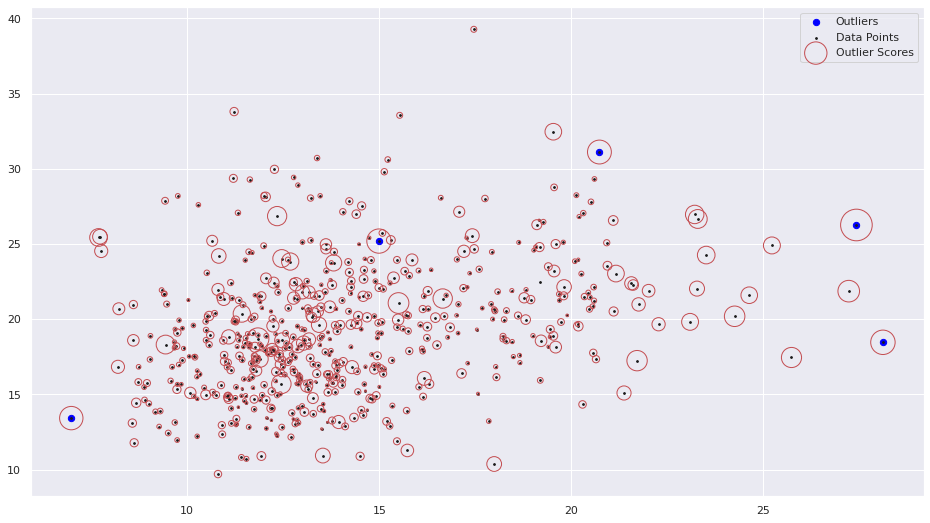

In [22]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold for negative lof values
threshold = -2
filter_ = outlier_score["score"] < threshold
outlier_index = outlier_score[filter_].index.tolist()

# Let's plot the outliers based on threshold we set
plt.figure(figsize = (16, 9))
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1], color = 'blue', s = 40, label = 'Outliers')
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = 'k', s = 3, label = 'Data Points')
radius = (X_score.max() - X_score) / (X_score.max() - X_score.min())  # Normalization
plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors = "r", facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [23]:
# Drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index)

# Splitting the dataset into Test data and Train data.

In [24]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [25]:
# Standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
y_train = y_train.reset_index().drop("index", axis = 1)
x_train = pd.DataFrame(x_train, columns = columns)
train_df = pd.concat([x_train, y_train], axis = 1)
train_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,target
0,-0.341501,-0.763712,-0.333129,-0.402012,-0.656703,-0.189561,-0.507837,-0.463354,-0.106630,-0.094194,...,-0.611776,-0.299193,-0.418930,-0.059154,-0.020998,-0.326089,-0.216192,1.085642,-0.191899,0
1,-1.038477,-0.128318,-1.040263,-0.926658,0.741259,-0.727209,-0.832293,-0.799738,-1.186957,0.418254,...,-0.166392,-1.108509,-0.917309,0.368999,-0.998500,-0.930489,-0.767009,-1.147810,-0.349567,0
2,-0.948825,0.667695,-0.959412,-0.851161,-0.570159,-0.904779,-0.667753,-0.896436,0.762011,-0.456418,...,1.061690,-0.712278,-0.705442,-0.097307,-0.574743,-0.405048,-0.620257,0.109342,-0.452395,0
3,-1.276490,-0.156663,-1.265222,-1.059958,-0.468959,-0.806973,-0.750960,-0.868147,1.572256,0.155712,...,0.010452,-1.104832,-0.899111,-0.389808,-0.674833,-0.719916,-0.762102,0.458737,0.040033,0
4,-0.156413,-1.132193,-0.177292,-0.242466,0.112421,-0.451643,-0.286702,-0.027957,0.283893,-0.752655,...,-1.030961,-0.221663,-0.293779,0.483456,-0.524698,-0.180766,0.207042,0.129403,-0.682613,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.902065,1.267658,0.942895,0.828354,0.762197,1.479979,0.994630,0.785486,0.437183,0.259606,...,1.353155,1.368777,1.506994,1.098132,3.128584,1.842136,1.143983,0.691110,2.819795,1
390,2.368317,0.122060,2.559920,2.537655,2.541930,3.261378,4.207956,3.430785,2.732877,1.034596,...,0.401801,3.060344,2.767795,1.589872,2.870560,3.315716,2.694306,1.931545,0.762680,1
391,1.113182,1.258209,0.984787,1.033317,-0.532471,-0.660929,-0.407264,-0.037473,-0.982571,-1.112071,...,1.495612,0.863146,0.836671,-0.046437,-0.503250,-0.330933,-0.026044,-0.661332,-0.289014,1
392,-0.017596,-0.825126,-0.088062,-0.123912,-1.152934,-0.935545,-0.858529,-0.575482,-0.796433,-1.005369,...,-1.022774,-0.318805,-0.335186,-1.237636,-1.016048,-1.035267,-0.508162,-1.276535,-0.996236,0


In [27]:
train_df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,target
count,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,...,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,3.940000e+02,394.00000
mean,-6.131587e-16,7.709569e-16,5.635650e-16,1.983749e-16,-8.340762e-16,-4.508520e-18,9.467892e-17,7.213632e-17,1.949935e-16,2.254260e-17,...,1.397641e-16,4.395807e-16,-1.307471e-16,-1.217300e-16,-3.155964e-17,4.959372e-17,-3.155964e-17,3.167235e-16,-1.284928e-16,0.36802
std,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,...,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,1.001271e+00,0.48288
min,-1.836963e+00,-2.230550e+00,-1.831181e+00,-1.385244e+00,-2.225659e+00,-1.550299e+00,-1.119268e+00,-1.257509e+00,-2.336629e+00,-1.833710e+00,...,-2.216469e+00,-1.524965e+00,-1.164641e+00,-2.603912e+00,-1.499664e+00,-1.338509e+00,-1.768048e+00,-1.985354e+00,-1.576067e+00,0.00000
25%,-6.878203e-01,-7.064321e-01,-6.859631e-01,-6.695699e-01,-7.203895e-01,-8.055489e-01,-7.617669e-01,-7.488177e-01,-7.033648e-01,-7.263306e-01,...,-7.096130e-01,-6.975689e-01,-6.600885e-01,-7.681511e-01,-7.169158e-01,-7.730797e-01,-7.682740e-01,-6.609143e-01,-6.877546e-01,0.00000
50%,-2.344969e-01,-8.462042e-02,-2.462037e-01,-3.130969e-01,-2.751526e-02,-2.382739e-01,-3.461710e-01,-3.890303e-01,-3.181028e-02,-1.664985e-01,...,-7.796968e-02,-2.850964e-01,-3.414068e-01,-5.915434e-02,-2.559498e-01,-2.185497e-01,-2.261594e-01,-1.355684e-01,-2.550236e-01,0.00000
75%,4.892299e-01,5.673075e-01,5.166462e-01,3.956467e-01,6.034173e-01,5.251829e-01,5.573583e-01,7.153421e-01,5.457631e-01,4.631811e-01,...,6.453704e-01,5.743235e-01,4.040255e-01,5.777770e-01,6.269862e-01,5.878742e-01,7.038810e-01,4.792160e-01,4.470576e-01,1.00000
max,3.799864e+00,4.754055e+00,3.787350e+00,4.722942e+00,4.691567e+00,3.449393e+00,4.212954e+00,3.916845e+00,4.499358e+00,4.832329e+00,...,3.927214e+00,3.749841e+00,4.390681e+00,3.815423e+00,4.418704e+00,4.726322e+00,2.694306e+00,6.249663e+00,5.053430e+00,1.00000


In [28]:
data_melted = pd.melt(train_df, id_vars = "target", var_name = "feature", value_name = "value")
data_melted.head()

,target,feature,value
0,0,radius_mean,-0.341501
1,0,radius_mean,-1.038477
2,0,radius_mean,-0.948825
3,0,radius_mean,-1.276490
4,0,radius_mean,-0.156413


# Model building

In [29]:
# KNN Model with k = 2
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
score = knn.score(x_test, y_test)
print("Score: ", score)
print("Confusion matrix: ")
print(cm)
print("Basic KNN accuracy: ", acc)

Score:  0.9529411764705882
Confusion matrix: 
[[107   0]
 [  8  55]]
Basic KNN accuracy:  0.9529411764705882


In [30]:
# Choosing best KNN parameters
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform", "distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test score: {}, train score: {}".format(acc_test, acc_train))
    print()
    print("confusion matrix Test")
    print(cm_test)
    print("confusion matrix Train")
    print(cm_train)
    
    return grid

grid = KNN_Best_Params(x_train, x_test, y_train, y_test)


Best training score 0.9692948717948718 with parameters: {'n_neighbors': 4, 'weights': 'distance'}

Test score: 0.9470588235294117, train score: 1.0

confusion matrix Test
[[104   3]
 [  6  57]]
confusion matrix Train
[[249   0]
 [  0 145]]


**The model is good but we can improve it by performing dimentionality reduction**

Principal Component Analysis (PCA)

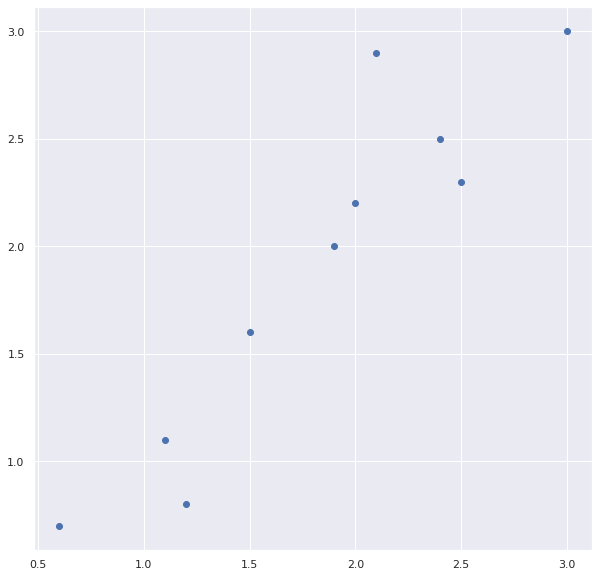

In [31]:
# Assume that we have two arrays to find eigen values and eigen vectors
x2 = np.array([2.4, 0.6, 2.1, 2, 3, 2.5, 1.9, 1.1, 1.5, 1.2])
y2 = np.array([2.5, 0.7, 2.9, 2.2, 3, 2.3, 2, 1.1, 1.6, 0.8])
plt.scatter(x2,y2)

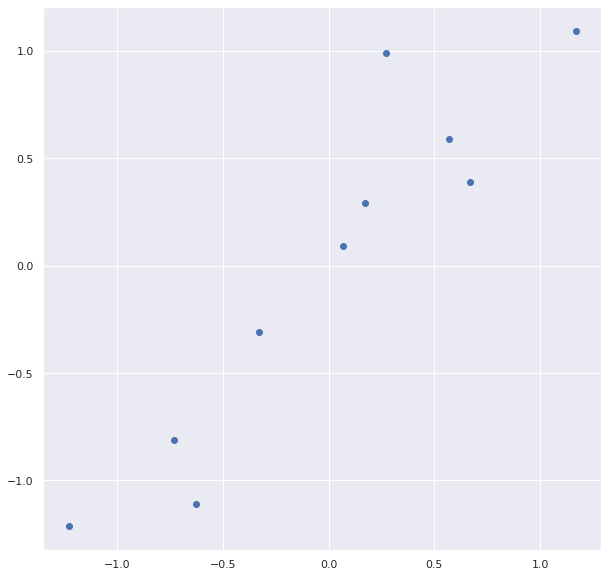

In [32]:
# Transform data to (0,0) center
x_mean = np.mean(x2)
y_mean = np.mean(y2)
x2 = x2 - x_mean
y2 = y2 - y_mean
plt.scatter(x2,y2)

In [33]:
# cov matrix
cov = np.cov(x2, y2)
cov

array([[0.53344444, 0.56411111],
       [0.56411111, 0.68988889]])

finding Eigen values and Eigen vectors.

In [34]:
from numpy import linalg as LA
w, v = LA.eig(cov)
w

array([0.04215805, 1.18117528])

In [35]:
v

array([[-0.75410555, -0.65675324],
       [ 0.65675324, -0.75410555]])

**Here w array represents Eigen values where each is repeadted according to its multiplicity. 
v array represents The normalized (unit “length”) eigenvectors, such that the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].**

In [36]:
p1 = v[:, 1]
p2 = v[:, 0]
p1

array([-0.65675324, -0.75410555])

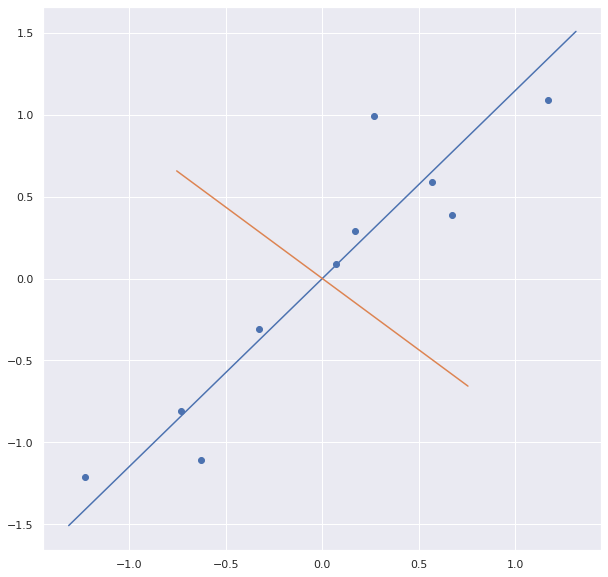

In [37]:
# visualizing eigen vectors and eigen values
plt.scatter(x2,y2)
# main component
plt.plot([-2 * p1[0], 2 * p1[0]] , [-2 * p1[1], 2 * p1[1]])
# small component
plt.plot([-1 * p2[0], 1 * p2[0]] , [-1 * p2[1], 1 * p2[1]])

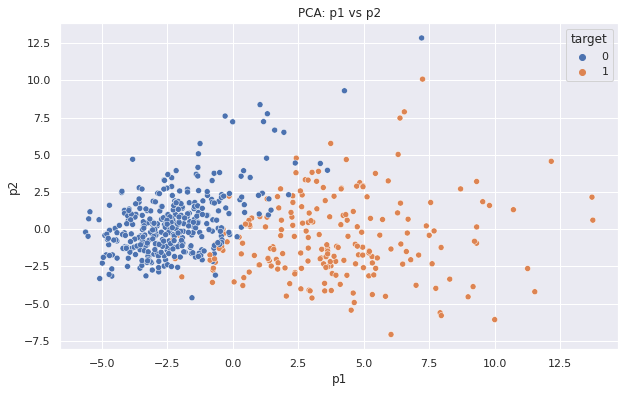

In [38]:
## PCA
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2) # reduction to 2 features
pca.fit(x_scaled)
x_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(x_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y.reset_index().drop("index", axis = 1)

# visualize PCA
plt.figure(figsize = (10, 6))
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")
plt.show()

In [39]:
# Train-test split
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced_pca, y, test_size = 0.3, random_state = 42)
grid_pca = KNN_Best_Params(x_train_pca, x_test_pca, y_train_pca, y_test_pca)


Best training score 0.9593589743589742 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test score: 0.9235294117647059, train score: 0.9593908629441624

confusion matrix Test
[[102   5]
 [  8  55]]
confusion matrix Train
[[243   6]
 [ 10 135]]


Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

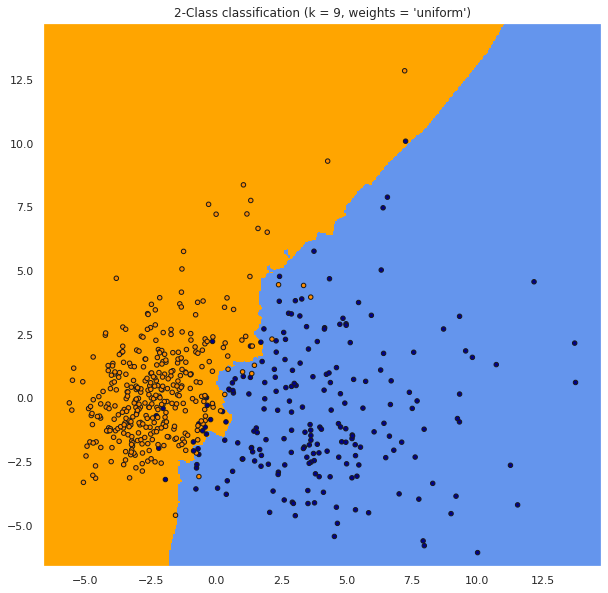

In [40]:
# visualize PCA
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "darkblue"])

h = .05
X = x_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# plot also the trainin points
plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, edgecolor = "k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')" % (len(np.unique(y)), grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

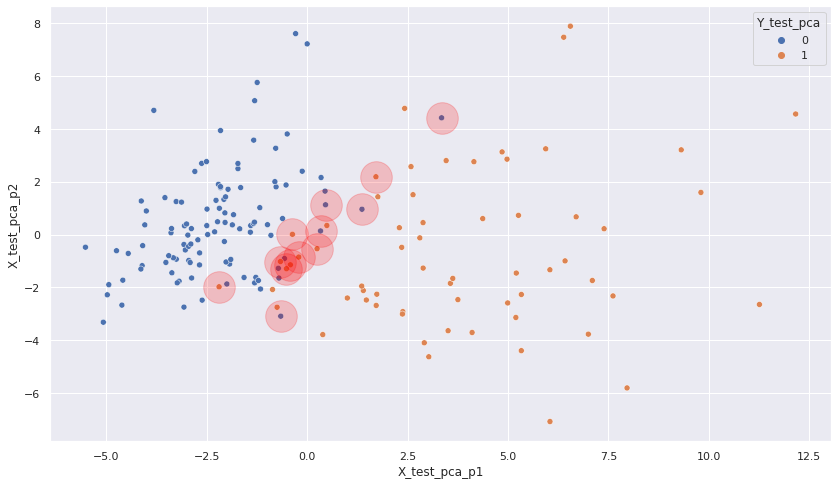

In [41]:
knn = KNeighborsClassifier(**grid_pca.best_params_)
knn.fit(x_train_pca, y_train_pca)
y_pred_pca = knn.predict(x_test_pca)
acc_test_pca = accuracy_score(y_pred_pca, y_test_pca)
knn.score(x_test_pca, y_test_pca)

test_data = pd.DataFrame()
test_data["X_test_pca_p1"] = x_test_pca[:,0]
test_data["X_test_pca_p2"] = x_test_pca[:,1]
test_data["Y_pred_pca"] = y_pred_pca
test_data["Y_test_pca"] = y_test_pca.reset_index().drop("index", axis = 1)

plt.figure(figsize = (14, 8))
sns.scatterplot(x = "X_test_pca_p1", y = "X_test_pca_p2", hue="Y_test_pca", data = test_data)

diff = np.where(y_pred_pca != y_test_pca)[0]
plt.scatter(test_data.iloc[diff, 0], test_data.iloc[diff, 1], label = "Wrong Classified", alpha = 0.2, color = "red",s = 1000)

# Neighborhood Component Analysis (NCA)

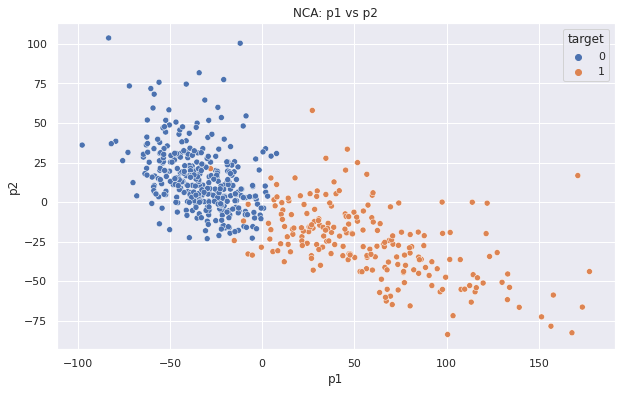

In [42]:
# NCA
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
x_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(x_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y.reset_index().drop("index", axis = 1)

plt.figure(figsize = (10, 6))
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")
plt.show()

In [43]:
# Train-test split
x_train_nca, x_test_nca, y_train_nca, y_test_nca = train_test_split(x_reduced_nca, y, test_size = 0.3, random_state = 42)
grid_nca = KNN_Best_Params(x_train_nca, x_test_nca, y_train_nca, y_test_nca)


Best training score 0.9949358974358974 with parameters: {'n_neighbors': 7, 'weights': 'distance'}

Test score: 0.9705882352941176, train score: 1.0

confusion matrix Test
[[107   0]
 [  5  58]]
confusion matrix Train
[[249   0]
 [  0 145]]


Text(0.5, 1.0, "2-Class classification (k = 7, weights = 'distance')")

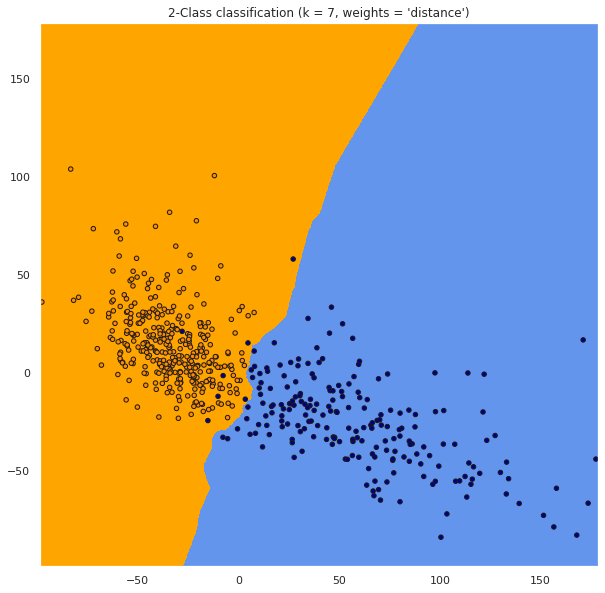

In [44]:
# visualize NCA
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ListedColormap(["darkorange", "darkblue"])

h = .2
X = x_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

# plot also the trainin points
plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold, edgecolor = "k", s = 20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')" % (len(np.unique(y)), grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

lets point out the wrongly classified datapoints.

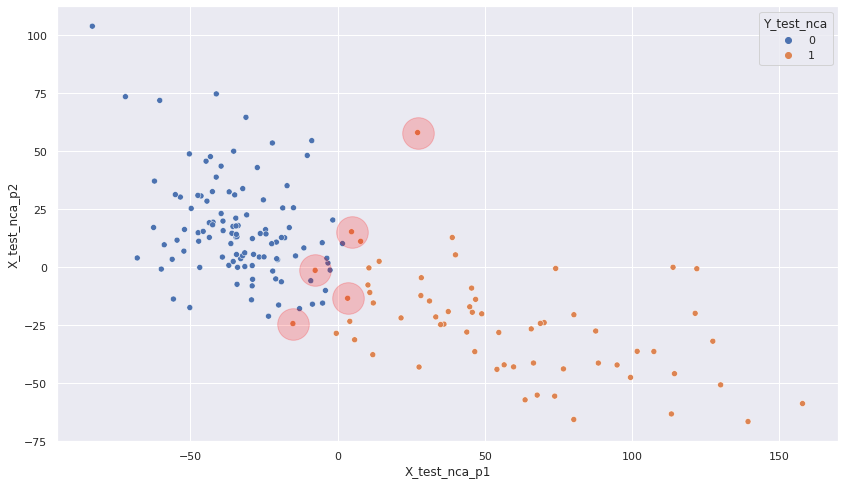

In [45]:
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(x_train_nca, y_train_nca)
y_pred_nca = knn.predict(x_test_nca)
acc_test_nca = accuracy_score(y_pred_nca, y_test_nca)
knn.score(x_test_nca, y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = x_test_nca[:,0]
test_data["X_test_nca_p2"] = x_test_nca[:,1]
test_data["Y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = y_test_nca.reset_index().drop("index", axis = 1)

plt.figure(figsize = (14, 8))
sns.scatterplot(x = "X_test_nca_p1", y = "X_test_nca_p2", hue="Y_test_nca", data = test_data)

diff = np.where(y_pred_nca != y_test_nca)[0]
plt.scatter(test_data.iloc[diff, 0], test_data.iloc[diff, 1], label = "Wrong Classified", alpha = 0.2, color = "red",s = 1000)